<a href="https://www.kaggle.com/code/kennethnjuguna/ibm-dv0101en-lab?scriptVersionId=138215354" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The Dataset: Immigration to canada from 1980-2013

# <h3>Import the required libraries to be used in the Notebook.</h3>

In [ ]:
!pip install --upgrade numpy==1.23.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

# <h3>import the required dataset canadian immigration.</h3>

In [ ]:
canadaimmigration=pd.read_csv('/kaggle/input/immigration-to-canada/canadian_immegration_data.csv')

Let's view the top 5 rows of the dataset using the head() function.

In [ ]:
canadaimmigration.head()

We can also view the bottom 5 rows of the dataset using the tail() function.

In [ ]:
canadaimmigration.tail()

When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the info() method.

In [ ]:
canadaimmigration.info()

This method can be used to get a short summary of the dataframe.

In [ ]:
canadaimmigration.info(verbose=False)

Get the list of column headers we can call upon the data frame's columns instance variable.

In [ ]:
canadaimmigration.columns

Get the list of indices we use the .index instance variables.

In [ ]:
canadaimmigration.index

To get the index and columns as lists, we can use the tolist() method.

In [ ]:
canadaimmigration.columns.tolist()

In [ ]:
canadaimmigration.index.tolist()

In [ ]:
print(type(canadaimmigration.columns.tolist()))
print(type(canadaimmigration.index.tolist()))

To view the dimensions of the dataframe, we use the shape instance variable of it.

In [ ]:
# size of dataframe (rows, columns)
canadaimmigration.shape 

# Cleaning the data

Let's clean the data set to remove a few unnecessary columns. We can use pandas drop() method as follows:

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:

In [ ]:
canadaimmigration['Total'] = canadaimmigration.sum(axis=1)

We can check to see how many null objects we have in the dataset as follows:

In [ ]:
canadaimmigration.isnull().sum()

# pandas Intermediate: Indexing and Selection (slicing)

In [ ]:
canadaimmigration.Country  # returns a series

Let's try filtering on the list of countries ('Country') and the data for years: 1980 - 1985.

In [ ]:
canadaimmigration[['Country', '1980','1981','1982','1983','1984','1985']]

Select Row
There are main 2 ways to select rows:

    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
Before we proceed, notice that the default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corresponding index value.

This can be fixed very easily by setting the 'Country' column as the index using set_index() method.

In [ ]:
canadaimmigration.set_index('Country', inplace=True)

In [ ]:
canadaimmigration.head(3)

Let's view the number of immigrants from Japan (row 87) for the following scenarios: 1. The full row data (all columns) 2. For year 2013 3. For years 1980 to 1985

In [ ]:
# 1. the full row data (all columns)
canadaimmigration.loc['Japan']

In [ ]:
# alternate methods
canadaimmigration.iloc[87]

In [ ]:
canadaimmigration[canadaimmigration.index == 'Japan']

Check for zambia all the details in the immigration.

In [ ]:
canadaimmigration[canadaimmigration.index=='Zambia']

In [ ]:
# alternate method
# year 2013 is the last column, with a positional index of 36
canadaimmigration.iloc[87, 36]

In [ ]:
# 3. for years 1980 to 1985
canadaimmigration.loc['Japan', ['1980', '1981', '1982', '1983', '1984', '1985']]

Lets do Yemen Migration from the years 1980-1984.

In [ ]:
canadaimmigration.loc['Yemen',['1980','1981','1982','1983','1984','1985']]

In [ ]:
# Alternative Method
canadaimmigration.iloc[87, [3, 4, 5, 6, 7, 8]]

Let me calculate for Algeria

In [ ]:
canadaimmigration.iloc[2,[3,4,5,6,7,8]]

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [ ]:
canadaimmigration.columns = list(map(str, canadaimmigration.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [ ]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

# <h3>Filtering based on a criteria.</h3>

To filter the dataframe based on a condition, we simply pass the condition as a boolean vector.

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).

In [ ]:
# 1. create the condition boolean series
condition = canadaimmigration['Continent'] == 'Asia'
print(condition)

In [ ]:
# 2. pass this condition into the dataFrame
canadaimmigration[condition]

In [ ]:
# we can pass multiple criteria in the same line.
# let's filter for AreaNAme = Asia and RegName = Southern Asia

canadaimmigration[(canadaimmigration['Continent']=='Asia') & (canadaimmigration['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

In [ ]:
# we can pass multiple criteria in the same line.
# let's filter for AreaNAme = Asia and RegName = Southern Asia

canadaimmigration[(canadaimmigration['Continent']=='Africa') & (canadaimmigration['Region']=='Eastern Africa')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

Before we proceed: let's review the changes we have made to our dataframe.

In [ ]:
print('data dimensions:', canadaimmigration.shape)
print(canadaimmigration.columns)
canadaimmigration.head(2)

# <h3>Visualizing Data using Matplotlib</h3>

*optional: check if Matplotlib is loaded.

In [ ]:
print(plt.style.available)
plt.style.use(['ggplot']) # optional: for ggplot-like style

# <h3>Plotting in pandas. </h3>

# <h4>Line Pots (Series/Dataframe)</h4>

# <h4>What is a line plot and why use it?</h4>

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

# <h4>Let's start with a case study:</h4>

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

 <h4>Plot a line graph of immigration from Haiti using df.plot().</h4>

In [ ]:
haiti = canadaimmigration.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

Next, we will plot a line plot by appending .plot() to the haiti dataframe.

In [ ]:
haiti.plot()

Also, let's label the x and y axis using plt.title(), plt.ylabel(), and plt.xlabel() as follows:

In [ ]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

Get the data set for China and India, and display the dataframe.

In [ ]:
df_CI = canadaimmigration.loc[['India', 'China'], years]
df_CI

Plot graph. We will explicitly specify line plot by passing in kind parameter to plot()

In [ ]:
df_CI.plot(kind='line')

Above doesn't look as good to resolve lets do a transpose().

In [ ]:
df_CI = df_CI.transpose()
df_CI.head()

In [ ]:
df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Compare the trend of top 5 countries that contributed the most to immigration to Canada

In [ ]:
#The correct answer is:    
#Step 1: Get the dataset. Recall that we created a Total column that calculates cumulative immigration by country. 
#We will sort on this column to get our top 5 countries using pandas sort_values() method.
    
inplace = True # paramemter saves the changes to the original df_can dataframe
canadaimmigration.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = canadaimmigration.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

print(df_top5)


#Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size



plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


plt.show()

# <h3>Area Plots.</h3>

In the last module, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a Stacked Line Plot or Area plot.

In [ ]:
canadaimmigration.sort_values(['Total'], ascending=False, axis=0, inplace=True)

In [ ]:
# get the top 5 entries
canadaimmigrationtop5 = canadaimmigration.head()

In [ ]:
# transpose the dataframe
canadaimmigrationtop5 = canadaimmigrationtop5[years].transpose()

In [ ]:
canadaimmigrationtop5.head()

Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN, i.e. not a number, values will default to 0). To produce an unstacked plot, set parameter stacked to value False.

In [ ]:
# let's change the index values of df_top5 to type integer for plotting
canadaimmigrationtop5.index = canadaimmigrationtop5.index.map(int)
canadaimmigrationtop5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.

In [ ]:
canadaimmigrationtop5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# <h3>Two types of plotting</h3>

There are two styles/options of plotting with matplotlib， plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' **

You can use plt i.e. matplotlib.pyplot and add more elements by calling different methods procedurally; for example, plt.title(...) to add title or plt.xlabel(...) to add label to the x-axis.

In [ ]:
# option 2: preferred option with more flexibility
ax = canadaimmigrationtop5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# <h3>Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.</h3>

In [ ]:
 # get the 5 countries with the least contribution
canadaimmigrationleast5 = canadaimmigration.tail(5)
     
# transpose the dataframe
canadaimmigrationleast5 = canadaimmigrationleast5[years].transpose() 
canadaimmigrationleast5.head()

canadaimmigrationleast5.index = canadaimmigrationleast5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
canadaimmigrationleast5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

In [ ]:
# get the 5 countries with the least contribution
canadaimmigrationleast5 = canadaimmigration.tail(5)

# transpose the dataframe
canadaimmigrationleast5 = canadaimmigrationleast5[years].transpose() 
    
canadaimmigrationleast5.head()

canadaimmigrationleast5.index = canadaimmigrationleast5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
    
ax = canadaimmigrationleast5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
    
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# Histograms

A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us Numpy's histrogram method to get the bin ranges and frequency counts as follows:

In [ ]:
# let's quickly view the 2013 data
canadaimmigration['2013'].head()

In [ ]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(canadaimmigration['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

We can easily graph this distribution by passing kind=hist to plot()

In [ ]:
canadaimmigration['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

In [ ]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(canadaimmigration['2013'])

canadaimmigration['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

 What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [ ]:
# let's quickly view the dataset 
canadaimmigration.loc[['Denmark', 'Norway', 'Sweden'], years]

In [ ]:
# generate histogram
canadaimmigration.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

Rectify the look with transpose
This can be easily fixed by first transposing the dataset, and then plotting as shown below

In [ ]:
# transpose dataframe
df_t = canadaimmigration.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

In [ ]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

increase the bin size to 15 by passing in bins parameter;
set transparency to 60% by passing in alpha parameter;
label the x-axis by passing in x-label parameter;
change the colors of the plots by passing in color parameter.

In [ ]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

If we do not want the plots to overlap each other, we can stack them using the stacked parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the xlim paramater, as show below.

In [ ]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [ ]:
# create a dataframe of the countries of interest (cof)
canadaimmigration_cof = canadaimmigration.loc[['Greece', 'Albania', 'Bulgaria'], years]

# transpose the dataframe
canadaimmigration_cof = canadaimmigration_cof.transpose() 

# let's get the x-tick values
count, bin_edges = np.histogram(canadaimmigration_cof, 15)

# Un-stacked Histogram
canadaimmigration_cof.plot(kind ='hist',
                figsize=(10, 6),
                bins=15,
                alpha=0.35,
                xticks=bin_edges,
                color=['coral', 'darkslateblue', 'mediumseagreen']
                )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# Bar Charts (Dataframe) 

A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via kind parameter in plot():

-kind=bar creates a vertical bar plot
-kind=barh creates a horizontal bar plot

# <h5>Vertical bar plot</h5>
In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

# <h5>Let's start off by analyzing the effect of Iceland's Financial Crisis:</h5>
The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [ ]:
# step 1: get the data
canadaimmigration_iceland = canadaimmigration.loc['Iceland', years]
canadaimmigration_iceland.head()

In [ ]:
# step 2: plot data
canadaimmigration_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the annotate method of the scripting layer or the pyplot interface. We will pass in the following parameters:

-s: str, the text of annotation.
-xy: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
-xytext: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
-xycoords: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
-arrowprops: Takes a dictionary of properties to draw the arrow:
-arrowstyle: Specifies the arrow style, '->' is standard arrow.
-connectionstyle: Specifies the connection type. arc3 is a straight line.
-color: Specifies color of arrow.
-lw: Specifies the line width.
-I encourage you to read the Matplotlib documentation for more details on annotations: http://matplotlib.orsg/api/pyplot_api.html#matplotlib.pyplot.annotate.

In [ ]:
canadaimmigration_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

Let's also annotate a text to go over the arrow. We will pass in the following additional parameters:

rotation: rotation angle of text in degrees (counter clockwise)
va: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
ha: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

In [ ]:
canadaimmigration_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

# <h3>Horizontal Bar Plot.</h3>

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to label categorical variables.

Using the scripting later and the canadaimmigration dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

In [ ]:
#Get the data pertaining to the top 15 countries.
# sort dataframe on 'Total' column (descending)
canadaimmigration.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
canadaimmigration_top15 = canadaimmigration['Total'].tail(15)
canadaimmigration_top15

Step 2: Plot data:

Use kind='barh' to generate a bar chart with horizontal bars.
Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

In [ ]:
# generate plot
canadaimmigration_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(canadaimmigration_top15): 
 label = format(int(value), ',') # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

# <h3>Pie Charts</h3>
A pie chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the kind=pie keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

# <h4>Gather data.</h4>

We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

1. Split: Splitting the data into groups based on some criteria.
2. Apply: Applying a function to each group independently: .sum() .count() .mean() .std() .aggregate() .apply() .etc..
3. Combine: Combining the results into a data structure.

In [ ]:
# group countries by continents and apply sum() function 
canadaimmigration_continents = canadaimmigration.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(canadaimmigration.groupby('Continent', axis=0)))

canadaimmigration_continents.head()

Step 2: Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:

* autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.
* startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
* shadow - Draws a shadow beneath the pie (to give a 3D feel).

In [ ]:
# autopct create %, start angle represent starting point
canadaimmigration_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
*   Pass in a custom set of colors for continents by passing in `colors` parameter.
*   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.


In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

canadaimmigration_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=canadaimmigration_continents.index, loc='upper left') 

plt.show()

pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

In [ ]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

canadaimmigration_continents['2013'].plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.12,            # the ratio between the pie center and start of text label
                                explode=explode_list         # 'explode' lowest 3 continents
                                )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=canadaimmigration_continents.index, loc='upper left') 

# show plot
plt.show()

Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

In [ ]:
 explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

canadaimmigration_continents['2013'].plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.12,            # the ratio between the pie center and start of text label
                                explode=explode_list         # 'explode' lowest 3 continents
                                )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=canadaimmigration_continents.index, loc='upper left') 

# show plot
plt.show()

# <h3>Box Plots </h3>
A box plot is a way of statistically representing the distribution of the data through five main dimensions:

* Minimum: The smallest number in the dataset excluding the outliers.
* First quartile: Middle number between the minimum and the median.
* Second quartile (Median): Middle number of the (sorted) dataset.
* Third quartile: Middle number between median and maximum.
* Maximum: The largest number in the dataset excluding the outliers.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">

To make a `boxplot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

Get the subset of the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the dataframe.describe() method to view the percentiles.

In [ ]:
# to get a dataframe, place extra square brackets around 'Japan'.
canadaimmigration_japan = canadaimmigration.loc[['Japan'], years].transpose()
canadaimmigration_japan.head()

Plot by passing in `kind='box'`.

In [ ]:
canadaimmigration_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:

* The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
* 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
* 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).
We can view the actual numbers by calling the describe() method on the dataframe.

In [ ]:
canadaimmigration_japan.describe()

One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyze these two countries further using box plots.

Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Get the dataset for China and India and call the dataframe df_CI.

In [ ]:
canadaimmigration_CI= canadaimmigration.loc[['China', 'India'], years].transpose()
canadaimmigration_CI.head()

Let's view the percentiles associated with both countries using the describe() method.

In [ ]:
canadaimmigration_CI.describe()

In [ ]:
#Plot data
canadaimmigration_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

We can observe that, while both countries have around the same median immigrant population (~20,000), China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

# <h3>Scatter Plots </h3>

A scatter plot (2D) is a useful method of comparing variables against each other. Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Get the dataset. Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.

In [ ]:
# we can use the sum() method to get the total population per year
canadaimmigration_tot = pd.DataFrame(canadaimmigration[years].sum(axis=0))

# change the years to type int (useful for regression later on)
canadaimmigration_tot.index = map(int, canadaimmigration_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
canadaimmigration_tot.reset_index(inplace = True)

# rename columns
canadaimmigration_tot.columns = ['year', 'total']

# view the final dataframe
canadaimmigration_tot.head()

Plot the data. In Matplotlib, we can create a scatter plot set by passing in kind='scatter' as plot argument. We will also need to pass in x and y keywords to specify the columns that go on the x- and the y-axis.

In [ ]:
canadaimmigration_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

# <h3>Bubble Plots</h3>

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable z, also known as the weight. In maplotlib, we can pass in an array or scalar to the parameter s to plot(), that contains the weight of each point.

# Let's start by analyzing the effect of Argentina's great depression.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and include it in the dataframe.

In [ ]:
# transposed dataframe
canadaimmigration_can_t =canadaimmigration[years].transpose()

# cast the Years (the index) to type int
canadaimmigration_can_t.index = map(int, canadaimmigration_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
canadaimmigration_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
canadaimmigration_can_t.reset_index(inplace=True)

# view the changes
canadaimmigration_can_t.head()

Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use feature scaling to bring all values into the range [0, 1]. The general formula is:

Image
where  
X
  is the original value,  
X
′
  is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.

In [ ]:
# normalize Brazil data
norm_brazil = (canadaimmigration_can_t['Brazil'] - canadaimmigration_can_t['Brazil'].min()) / (canadaimmigration_can_t['Brazil'].max() - canadaimmigration_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (canadaimmigration_can_t['Argentina'] - canadaimmigration_can_t['Argentina'].min()) / (canadaimmigration_can_t['Argentina'].max() - canadaimmigration_can_t['Argentina'].min())

Plot the data.

* To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the ax parameter.
* We will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
* multiply weights by 2000 to scale it up on the graph, and,
* add 10 to compensate for the min value (which has a 0 weight and therefore scale with × 2000.

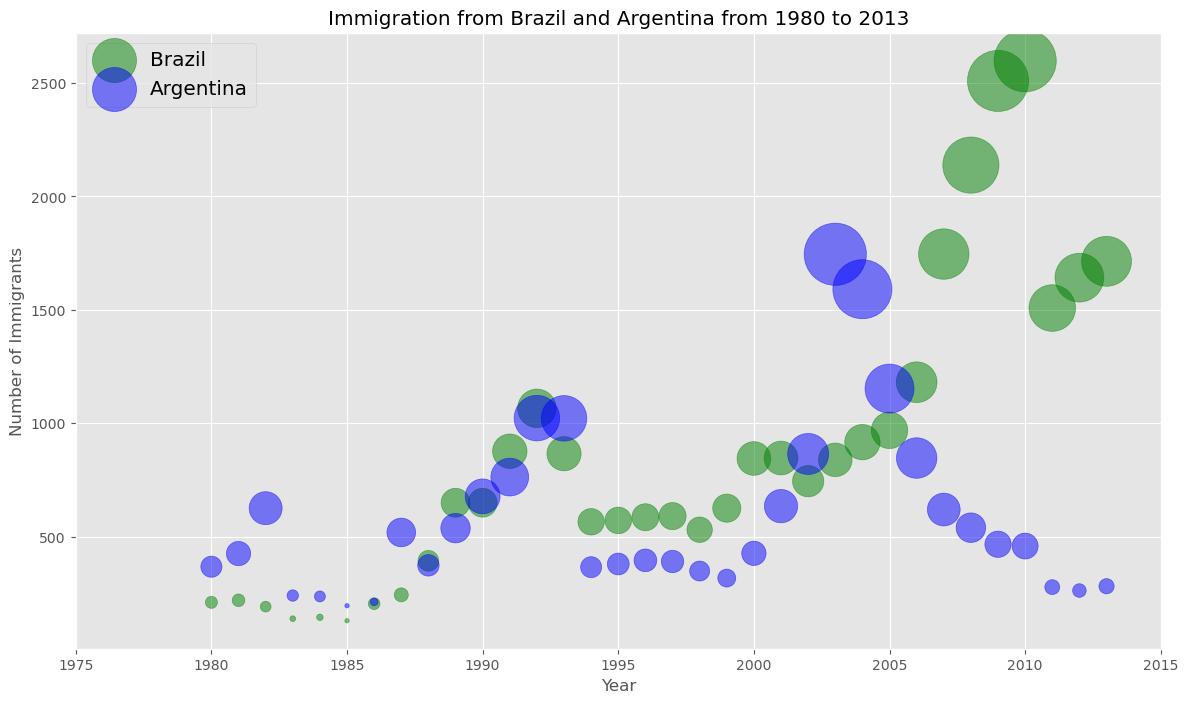

In [171]:
# Brazil
ax0 = canadaimmigration_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = canadaimmigration_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.